In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import random

In [3]:
gender_df = pd.read_csv('gender_data.csv')
gender_df['name'] = gender_df['name'].str.upper()
gender_df.sample(5)

,name,probability_female,frequency
17315,CHRISPHER,0.000000,4.308853e-08
65944,NAOD,0.000000,4.653561e-07
49074,KEYEN,0.000000,2.125701e-07
46530,KASHAWN,0.072222,3.102374e-06
92267,VIRDIA,1.000000,1.838444e-07


In [4]:
salary_df = pd.read_csv('salary_data.csv')

last_name = salary_df['person'].str.split(';').str[0].str.upper()
first_name = salary_df['person'].str.split(';').str[1].str.split(' ').str[0].str.upper()

salary_df['person'] = first_name.str.cat(last_name, join='left', sep= ' ')

salary_df.sample(5)

,person,department,title,total,year_end,annual_base_salary,regular,overtime,bonus,sick_leave_payout,vacation_payout,remaining
21267,RUTH CANTWELL,Cancer Hosp & Research Instit,Unit Clerical Associate,45446.91,2017,34112.00,40219.63,4845.07,382.21,NaN,NaN,NaN
9501,KATHRYN SCHWEGMAN,Commencement & Official Events,Program Coord-Special Events,49807.00,2017,50016.00,49432.00,NaN,375.00,NaN,NaN,NaN
20596,JOEL BUNDY,University Hospitals East,Patient Care Coordinator,57466.02,2017,49495.68,54443.46,2640.35,382.21,NaN,NaN,NaN
19068,BRITTANY YOUNG,University Hospitals East,Patient Revenue Cycle Spclst,31976.26,2017,31366.40,31095.38,498.67,382.21,NaN,NaN,NaN
2059,JASPER MULDROW JR.,University Hospitals East,Sous Chef,55746.82,2017,50086.40,49192.04,6176.96,377.82,NaN,NaN,NaN


In [5]:
ratings_df = pd.read_csv('ratings_data_edit.csv')
ratings_df['person'] = ratings_df['first_name'].str.split(' ').str[0].str.upper()
ratings_df['person'] = ratings_df['person'].str.cat(ratings_df['last_name'].str.upper(), sep=' ')
ratings_df.sample(5)

,first_name,middle_name,last_name,title,overall_quality,would_take_again,level_of_difficulty,num_ratings,tags,comments,person
332,Andre,NaN,Murnieks,Professor in the Industrial Design department,5,NaN,1.0,2.0,NaN,if you go to class and have the books/comma th...,ANDRE MURNIEKS
6427,Wamae,NaN,Muriuki,Professor in the Education department,4.8,NaN,2.5,2.0,NaN,He was my TA for comparative studies 100. He r...,WAMAE MURIUKI
5972,Steven,NaN,Schiele,Professor in the Psychology department,4.8,100%,2.1,10.0,Amazing lectures:5;; Caring:5;; Respected:5;;...,He is GREAT!! If you have the option/comma tak...,STEVEN SCHIELE
4124,Margaret,NaN,Newell,Professor in the History department,4.2,NaN,2.7,26.0,ACCESSIBLE OUTSIDE CLASS:1;; Get ready to rea...,I took this class as an elective because it so...,MARGARET NEWELL
5948,Steven,NaN,Brown,Professor in the Philosophy department,4.3,60%,2.0,48.0,Hilarious:17;; Amazing lectures:11;; Respecte...,Super super nice guy/comma very fun professor....,STEVEN BROWN


In [6]:
classes_df = pd.read_csv('Classes_spring_cleaned.csv')
classes_df = classes_df.drop(['Unnamed: 0'], axis = 1)
classes_df['person'] = classes_df['INSTRUCTOR'].str.split(' ').str[0].str.upper()
classes_df['person'] = classes_df['person'].str.cat(classes_df['INSTRUCTOR'].str.split(' ').str[-1].str.upper(), sep=' ')

classes_df.sample(5)

,CLASS_NAME,CLASS_ID,CLASS_CREDITS,STUDENT_TYPE,GRADE_BASIS,MTG_SCHED,MTG_LOC,INSTRUCTOR,MTG_DATE,PREREQUISITES,ENROLL_CAP,WAIT_CAP,ENROLL_NUM,WAIT_NUM,AVAILABLE_SEATS,CLASS_DESCRIPTION,person
14149,HTHRHSC 4450.01 - 0010 Health Promotion in Pra...,35170,3 units,Undergraduate,Graded A-E,TBA,Online,Melinda Hill,01/08/2018 - 04/23/2018,NaN,10,999,6,0,4,Integration of theory and emergent perspective...,MELINDA HILL
18180,MICRBIO 8193 - 0070 Individual Studies,28974,1 - 5 units,Graduate,Satisfactory/Unsatisfactory,TBA,TBA,Chad Rappleye,01/08/2018 - 04/23/2018,NaN,5,0,0,0,5,Selected topics in microbiology outlined by in...,CHAD RAPPLEYE
9826,ECON 8194 - 0010 Group Studies,35117,3 units,Graduate,Graded A-E,TuTh 12:45PM - 2:05PM,Bolz Hall 311,Adam Dearing,01/08/2018 - 04/23/2018,Prereq: 8711 and 8731 or Instructor Permission,20,999,6,0,14,Advanced new course material in economics offe...,ADAM DEARING
9588,EARTHSC 7999 - 41 Research for Thesis in the E...,27004,1 - 12 units,Graduate,Satisfactory/Unsatisfactory,TBA,TBA,Thomas Darrah,01/08/2018 - 04/23/2018,Prereq: Grad standing in EarthSc or GeodSci.,5,999,0,0,5,Graduate-level research for thesis purposes on...,THOMAS DARRAH
11578,ECE 8891 - 320 Seminar in Electrical and Compu...,28251,0.5 - 2 units,Graduate,Satisfactory/Unsatisfactory,TBA,TBA,Levent Guvenc,01/08/2018 - 04/23/2018,Prereq: Grad standing in ECE.,20,999,2,0,18,Seminar in Electrical and Computer Engineering...,LEVENT GUVENC


<p style="text-align: center;">
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%<br>
investigate: salary vs gender<br>
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</p>

Text(0.5, 0, 'Annual Base Salary (USD)')

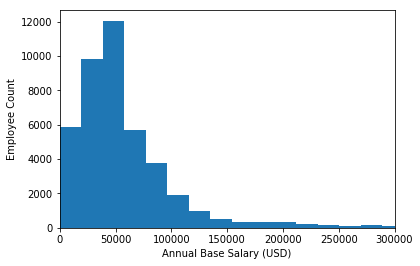

In [7]:
plt.hist(salary_df['annual_base_salary'],100);
plt.xlim([0,3*10**5]);
plt.ylabel('Employee Count')
plt.xlabel('Annual Base Salary (USD)')

In [8]:
salary_df['first_name'] = salary_df['person'].str.split(' ').str[0]
if 'probability_female' not in salary_df:
    salary_df = salary_df.merge(gender_df, left_on='first_name', right_on='name', how='left', suffixes=(False,False))
salary_df.sample(10)

,person,department,title,total,year_end,annual_base_salary,regular,overtime,bonus,sick_leave_payout,vacation_payout,remaining,first_name,name,probability_female,frequency
17863,TERESA WILLIAMS,Ross Heart Hospital,Staff Nurse-A,30366.00,2017,72849.92,22865.03,1025.91,NaN,NaN,6475.06,NaN,TERESA,TERESA,0.997192,1.190671e-03
26584,JOSHUA EBEL,Urology,Clinical Inst HS,56259.93,2017,56636.04,55706.02,NaN,553.91,NaN,NaN,NaN,JOSHUA,JOSHUA,0.004071,3.468250e-03
20848,JEAN BUSTAMANTEALVAREZ,Internal Medicine,Clinical Inst HS,28807.71,2017,56636.04,28807.71,NaN,NaN,NaN,NaN,NaN,JEAN,JEAN,0.950466,1.383561e-03
19006,YIN YIU,Otolaryngology,Clinical Inst HS,58935.28,2017,58461.00,58368.02,NaN,567.26,NaN,NaN,NaN,YIN,YIN,1.000000,3.734339e-08
13322,JULIE SWAIN,Specialty Care Network,Nursing-A5,102672.85,2017,103452.00,102290.64,NaN,382.21,NaN,NaN,NaN,JULIE,JULIE,0.997008,1.463123e-03
28688,TYRANDA FRANKLIN,Special Duty,Auxiliary Law Enforcement Ofcr,315.00,2017,468.00,315.00,NaN,NaN,NaN,NaN,NaN,TYRANDA,NaN,NaN,NaN
29925,STACEY ARNOLD,Special Duty,Auxiliary Law Enforcement Ofcr,1786.50,2017,468.00,1786.50,NaN,NaN,NaN,NaN,NaN,STACEY,STACEY,0.913840,4.628569e-04
29862,TRISHA GIBSON,EEOB,Research Associate 1-B/H,40316.00,2017,40123.20,39941.00,NaN,375.00,NaN,NaN,NaN,TRISHA,TRISHA,0.998672,1.146815e-04
19861,ERIC BRICKNER,University Hospitals,Rehab Team Member,24445.70,2017,63490.08,23233.69,NaN,1212.01,NaN,NaN,NaN,ERIC,ERIC,0.004884,2.525077e-03
28463,TONYA FORSYTHE,School of Communication,Lecturer,43000.00,2017,43128.00,43000.00,NaN,NaN,NaN,NaN,NaN,TONYA,TONYA,0.996397,3.468224e-04


In [9]:
salary_df['annual_base_salary'] = np.maximum(salary_df['annual_base_salary'],salary_df['total'])

In [10]:
sample_size = 100;
iterations = 2000;

m_salary = np.zeros(iterations)
f_salary = np.zeros(iterations)

for i in range(iterations):
    m_count=0
    f_count=0
    
    m_sum=0
    f_sum=0
    
    while(True):
        sample = salary_df.sample(1000)

        m_sum += sample.loc[sample['probability_female']<.1]['annual_base_salary'].sum()
        f_sum += sample.loc[sample['probability_female']>.9]['annual_base_salary'].sum()
        
        m_count += len(sample.loc[sample['probability_female']<.1]['annual_base_salary'])
        f_count += len(sample.loc[sample['probability_female']>.9]['annual_base_salary'])
        
        if(m_count>sample_size and f_count>sample_size):
            break

            
    m_salary[i] = (m_sum/m_count)
    f_salary[i] = (f_sum/f_count)
        


[71849.04153534668, 5560.995193631656]
[59733.46499675332, 2006.0798556436023]


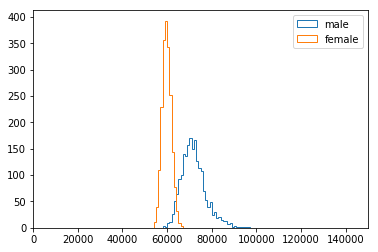

In [11]:
hist_m = plt.hist(m_salary, bins = [i for i in range(0,3*10**5,1*10**3)], histtype='step', label='male')
plt.hist(f_salary, bins=hist_m[1], histtype='step', label='female')
plt.xlim([0,1.5*10**5])
plt.legend()

print([m_salary.mean(),m_salary.std()])
print([f_salary.mean(),f_salary.std()])

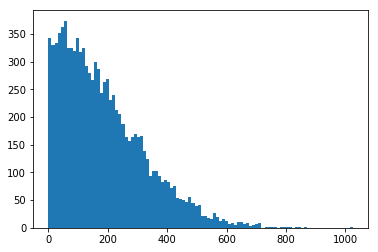

In [12]:
iterations = 10000
sample_size = len(m_salary)

mf_salary = np.concatenate((m_salary,f_salary), axis=0)
mean_diffs = np.zeros(iterations)

for i in range(iterations):
    shuffled = np.random.permutation(len(mf_salary))
    mean_diffs[i] = abs(mf_salary[shuffled[:sample_size]].mean() - mf_salary[shuffled[sample_size:]].mean())

plt.hist(mean_diffs,100);

In [13]:
jobs = salary_df['department'].str.cat(salary_df['title'], sep=' ')
titles = jobs.unique()
mask = np.ones(len(titles), dtype=bool)

for t in range(len(titles)):
    
    if(len(jobs[jobs==titles[t]])<10):
        mask[t] = False
        continue
    
    if(salary_df.loc[jobs==titles[t]]['annual_base_salary'].mean() < 20000):
        mask[t] = False
        continue
        
    if(salary_df.loc[jobs==titles[t]]['probability_female'].max()<.9):
        mask[t] = False
        continue
    
    if(salary_df.loc[jobs==titles[t]]['probability_female'].min()>.1):
        mask[t] = False
        continue
    
    temp = salary_df.loc[jobs==titles[t]]['annual_base_salary']
    salary_df.loc[jobs==titles[t],'annual_base_salary_norm'] = (temp-temp.mean())/temp.std()
    
titles = titles[mask]
salary_df['mask'] = jobs.isin(titles)


In [14]:
sample_size = 200;
iterations = 5000;

m_salary2 = np.zeros(iterations)
f_salary2 = np.zeros(iterations)

for i in range(iterations):
    m_count=0
    f_count=0
    
    m_sum=0
    f_sum=0
    
    while(True):
        sample = salary_df.loc[salary_df['mask']].sample(1000)

        m_sum += sample.loc[sample['probability_female']<.1]['annual_base_salary_norm'].sum()
        f_sum += sample.loc[sample['probability_female']>.9]['annual_base_salary_norm'].sum()
        
        m_count += len(sample.loc[sample['probability_female']<.1]['annual_base_salary_norm'])
        f_count += len(sample.loc[sample['probability_female']>.9]['annual_base_salary_norm'])
        
        if(m_count>sample_size and f_count>sample_size):
            break

            
    m_salary2[i] = (m_sum/m_count)
    f_salary2[i] = (f_sum/f_count)

[0.05223307649697522, 0.0561381878797582]
[-0.03200031556570817, 0.03936488572284202]


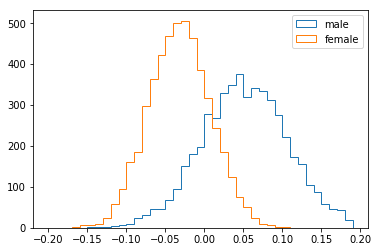

In [15]:
hist_m = plt.hist(m_salary2, bins = [i/100 for i in range(-20,20)], histtype='step', label='male')
plt.hist(f_salary2, bins=hist_m[1], histtype='step', label='female')
plt.legend()

print([m_salary2.mean(),m_salary2.std()])
print([f_salary2.mean(),f_salary2.std()])

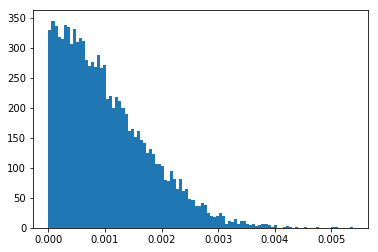

In [16]:
iterations = 10000
sample_size = len(m_salary2)

mf_salary = np.concatenate((m_salary2,f_salary2), axis=0)
mean_diffs = np.zeros(iterations)

for i in range(iterations):
    shuffled = np.random.permutation(len(mf_salary))
    mean_diffs[i] = abs(mf_salary[shuffled[:sample_size]].mean() - mf_salary[shuffled[sample_size:]].mean())

plt.hist(mean_diffs,100);

In [17]:
mf_salary.mean()

0.010116380465633523

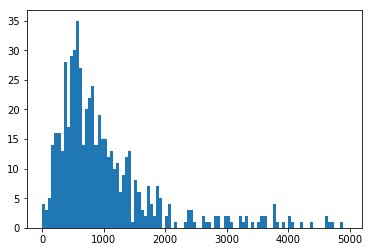

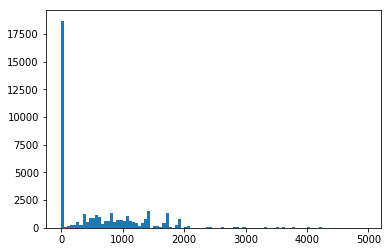

819.611042979606
394.9984728488815


In [18]:
std_list = np.zeros(len(titles))
fraction_list = np.zeros(len(titles))
std_list_weighted = np.zeros(len(jobs))
fraction_list_weighted = np.zeros(len(jobs))
for t in range(len(titles)):
    std_list[t] = salary_df.loc[jobs==titles[t],'annual_base_salary'].std()*0.078
    std_list_weighted[jobs==titles[t]] = std_list[t]
    
    fraction_list[t] = salary_df.loc[jobs==titles[t],'annual_base_salary'].std()*0.078/salary_df.loc[jobs==titles[t],'annual_base_salary'].mean()
    fraction_list_weighted[jobs==titles[t]] = fraction_list[t]

plt.hist(std_list,[i for i in range(0,5000,50)]);
plt.show()
plt.hist(std_list_weighted,[i for i in range(0,5000,50)]);
plt.show()
print(np.median(std_list))
print(np.median(std_list_weighted))

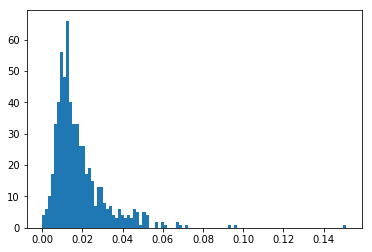

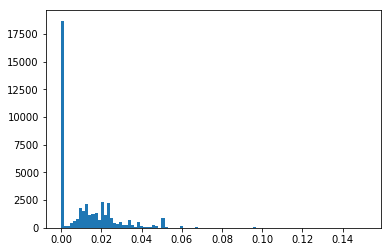

0.014511017599229445
0.009502510790070336


In [19]:
plt.hist(fraction_list,100)
plt.show()
plt.hist(fraction_list_weighted,100)
plt.show()

print(np.median(fraction_list))
print(np.median(fraction_list_weighted))

In [24]:
f_salary_norm = np.zeros(len(titles))
for t in range(len(titles)):
    f_salary_norm[t] = np.median(salary_df[(jobs==titles[t]) & (salary_df['probability_female']>.9)]['annual_base_salary_norm'])

E:\anaconda\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [31]:
ind = np.argsort(f_salary_norm)
for i in zip(titles[ind],f_salary_norm[ind]):
    print(i)

('Surgery Associate Professor-Clinical', -1.5695213163572408)
('Athletics Assistant Coach-Major Sports', -1.39840235393665)
('Davis Heart & Lung Institute Visiting Scholar', -1.3404789002130169)
('Internal Medicine Assistant Professor', -1.3070745421512666)
('Lima Campus Professor', -1.2348587093277321)
('Surgery Associate Professor', -1.1552988302541631)
('SL Bldg & Mech Services Painter 2', -1.139267697782548)
('University Airport Aircraft Mechanic', -1.1381264694372424)
('SL Bldg & Mech Services Maintenance Repair Worker 3', -1.1180798918051884)
('University Hospitals East Patient Transporter', -1.062986509990319)
('University Hospitals Storekeeper 2', -1.0608707710508996)
('Pathology Assistant Professor-Clinical', -1.0510316396543464)
('Sch of Environ & Natural Res Associate Professor', -1.0440246701828269)
('Internal Audit Senior Auditor', -0.9856148686756591)
('Counseling & Consultation Psychology Intern', -0.974679434480895)
('OCIO Operations Director-A4', -0.9088573262697143)
(

In [112]:
iterations = 500.
d = {'title': titles[ind],'f_salary_norm': f_salary_norm[ind]}
jobs_df = pd.DataFrame(data = d)
for i in ind:
    
    subset = salary_df[jobs==titles[i]]
    
    
    count=0.
    diff = np.median(subset[subset['probability_female']>=.9]['annual_base_salary_norm']) - np.median(subset[subset['probability_female']<=.1]['annual_base_salary_norm'])
    diff2 = np.median(subset[subset['probability_female']>=.9]['annual_base_salary']) - np.median(subset[subset['probability_female']<=.1]['annual_base_salary'])
    
    jobs_df.loc[jobs_df['title']==titles[i], 'f_percent'] = len(subset[subset['probability_female']>=.9])/len(subset)
    jobs_df.loc[jobs_df['title']==titles[i], 'diff_annual_base_salary_norm'] = diff
    jobs_df.loc[jobs_df['title']==titles[i], 'diff_annual_base_salary2'] = diff2
    
    split = len(subset[subset['probability_female']>=.9]);
    
    for iter in range(int(iterations)):
        shuffled = np.random.permutation(len(subset))
        f_med = np.median(subset.iloc[shuffled[:split]]['annual_base_salary_norm'])
        m_med = np.median(subset.iloc[shuffled[split:]]['annual_base_salary_norm'])
        
        if(diff>0 and f_med-m_med >= diff):
            count += 1
        elif(diff<=0 and f_med-m_med <= diff):
            count += 1
    
    jobs_df.loc[jobs_df['title']==titles[i], 'p_val'] = count/iterations



In [113]:
jobs_df

,title,f_salary_norm,f_percent,diff_annual_base_salary_norm,diff_annual_base_salary2,p_val
0,Surgery Associate Professor-Clinical,-1.569521,0.312500,-2.131473,-317858.370,0.004
1,Athletics Assistant Coach-Major Sports,-1.398402,0.047619,-1.533356,-348051.255,0.076
2,Davis Heart & Lung Institute Visiting Scholar,-1.340479,0.100000,-1.550378,-13000.020,0.000
3,Internal Medicine Assistant Professor,-1.307075,0.275862,-1.651766,-106765.340,0.000
4,Lima Campus Professor,-1.234859,0.272727,-1.337972,-41088.305,0.022
5,Surgery Associate Professor,-1.155299,0.111111,-1.500223,-308428.210,0.004
6,SL Bldg & Mech Services Painter 2,-1.139268,0.166667,-1.502019,-9968.280,0.074
7,University Airport Aircraft Mechanic,-1.138126,0.200000,-1.431930,-9068.800,0.056
8,SL Bldg & Mech Services Maintenance Repair Wor...,-1.118080,0.028571,-1.179457,-10925.570,0.122
9,University Hospitals East Patient Transporter,-1.062987,0.076923,-1.387409,-6455.525,0.152


In [141]:
jobs_df[jobs_df['diff_annual_base_salary2']<-50000]

,title,f_salary_norm,f_percent,diff_annual_base_salary_norm,diff_annual_base_salary2,p_val
0,Surgery Associate Professor-Clinical,-1.569521,0.312500,-2.131473,-317858.370,0.004
1,Athletics Assistant Coach-Major Sports,-1.398402,0.047619,-1.533356,-348051.255,0.076
3,Internal Medicine Assistant Professor,-1.307075,0.275862,-1.651766,-106765.340,0.000
5,Surgery Associate Professor,-1.155299,0.111111,-1.500223,-308428.210,0.004
11,Pathology Assistant Professor-Clinical,-1.051032,0.411765,-1.657566,-141515.635,0.008
22,Emergency Medicine Associate Professor-Clinical,-0.817948,0.300000,-1.270189,-58292.925,0.000
37,Economics Professor,-0.700282,0.133333,-0.851137,-67718.765,0.054
45,Mechanical & Aerospace Engr Professor,-0.659733,0.160000,-1.001629,-51422.635,0.086
47,Internal Medicine Professor-Clinical,-0.653757,0.257143,-0.572241,-95450.490,0.006
76,Anesthesiology Assistant Professor-Clinical,-0.552999,0.312500,-0.931872,-95485.905,0.002


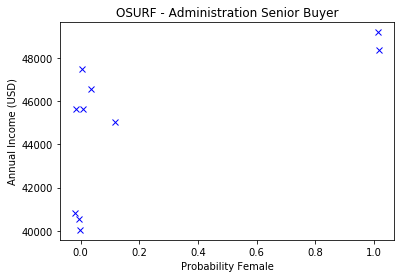

In [119]:
position = titles[ind[-7]];

length = len(salary_df[jobs==position]);
plt.plot(salary_df[jobs==position]['probability_female']+np.random.uniform(low=-.05,high=.05,size=length),salary_df[jobs==position]['annual_base_salary'],'bx')
plt.title(position);
plt.xlabel('Probability Female');
plt.ylabel('Annual Income (USD)');

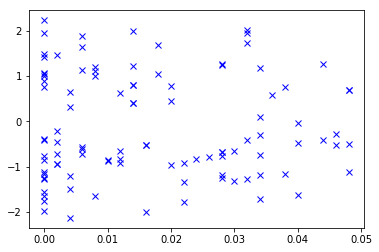

In [125]:
plt.plot(jobs_df.loc[jobs_df['p_val']<.05,'p_val'],jobs_df.loc[jobs_df['p_val']<.05,'diff_annual_base_salary_norm'],'bx');

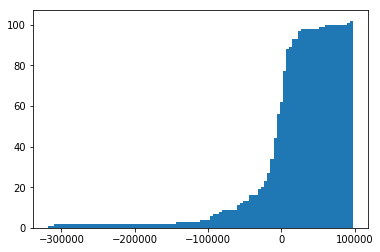

In [139]:
plt.hist(jobs_df.loc[jobs_df['p_val']<.05,'diff_annual_base_salary2'],100,cumulative=True);